In [48]:
import numpy as np
import pandas as pd
import sklearn as sk
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from matplotlib import pyplot as plt

In [49]:
df = pd.read_csv("../data/raw/heart_cleveland_upload.csv")

In [50]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,40,1,3,152,223,0,0,181,0,0.0,0,0,2,1
293,39,1,3,118,219,0,0,140,0,1.2,1,0,2,1
294,35,1,3,120,198,0,0,130,1,1.6,1,0,2,1
295,35,0,3,138,183,0,0,182,0,1.4,0,0,0,0


### Checking NULL values in DataFrame

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3   trestbps   297 non-null    int64  
 4   chol       297 non-null    int64  
 5   fbs        297 non-null    int64  
 6   restecg    297 non-null    int64  
 7   thalach    297 non-null    int64  
 8   exang      297 non-null    int64  
 9   oldpeak    297 non-null    float64
 10  slope      297 non-null    int64  
 11  ca         297 non-null    int64  
 12  thal       297 non-null    int64  
 13  condition  297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.6 KB


As it can be seen, there no NULL values in DF.

### Checking duplicate values in DataFrame

In [52]:
df.shape

(297, 14)

In [53]:
df = df.drop_duplicates()

In [54]:
df.shape

(297, 14)

As it can be seen, there are no duplicates in DF.

### Column description

* age: age in years
* sex: sex (1 = male; 0 = female)
* cp: chest pain type
-- Value 0: typical angina
-- Value 1: atypical angina
-- Value 2: non-anginal pain
-- Value 3: asymptomatic
* trestbps: resting blood pressure (in mm Hg on admission to the hospital)
* chol: serum cholestoral in mg/dl
* fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
* restecg: resting electrocardiographic results
-- Value 0: normal
-- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
-- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
* thalach: maximum heart rate achieved
* exang: exercise induced angina (1 = yes; 0 = no)
* oldpeak = ST depression induced by exercise relative to rest
* slope: the slope of the peak exercise ST segment
-- Value 0: upsloping
-- Value 1: flat
-- Value 2: downsloping
* ca: number of major vessels (0-3) colored by flourosopy
* thal: 0 = normal; 1 = fixed defect; 2 = reversable defect 
and the label
* condition: 0 = no disease, 1 = disease

### Unique values

In [55]:
df.nunique()

age           41
sex            2
cp             4
trestbps      50
chol         152
fbs            2
restecg        3
thalach       91
exang          2
oldpeak       40
slope          3
ca             4
thal           3
condition      2
dtype: int64

### Renaming columns and categorial features

In [56]:
if "cp" in df:
    df = df.rename(columns={
        "cp": "chest pain",
        "trestbps": "resting blood pressure",
        "chol": "cholesterol",
        "fbs": "fasting blood sugar",
        "restecg": "resting electrocardiographic results",
        "thalach": "max heart rate",
        "exang": "exercise induced angina",
        "ca": "number of major vessels"
        })

In [58]:
df.to_csv("../data/processed/heart_cleveland_upload.csv", index=False)

In [162]:
df["sex"] = df["sex"].map({0: "female", 1: "male"})
df["chest pain"] = df["chest pain"].map({0: "typical angina",
                                        1: "atypical angina",
                                        2: "non-anginal pain",
                                        3: "asyptomatic"})
df["fasting blood sugar"] = df["fasting blood sugar"].map({1: "> 120 mg/dl",
                                                          0: "<= 120 mg/dl"})
df["resting electrocardiographic results"] = df["resting electrocardiographic results"].map({
    0: "normal",
    1: "having ST-T wave abnormality",
    2: "showing probable or definite left ventricular hypertrophy by Estes' criteria"
})
df["exercise induced angina"] = df["exercise induced angina"].map({1: "yes", 0: "no"})
df["slope"] = df["slope"].map({
    0: "upsloping",
    1: "flat",
    2: "downsloping"
})
df["thal"] = df["thal"].map({
    0: "normal",
    1: "fixed defect",
    2: "reversable defect and the label"
})
df["condition"] = df["condition"].map({
    0: "no disease",
    1: "disease"
})

In [163]:
df.nunique()

age                                      41
sex                                       2
chest pain                                4
resting blood pressure                   50
cholesterol                             152
fasting blood sugar                       2
resting electrocardiographic results      3
max heart rate                           91
exercise induced angina                   2
oldpeak                                  40
slope                                     3
number of major vessels                   4
thal                                      3
condition                                 2
dtype: int64

### Seperating categorial and numerical features

In [164]:
numerical = ["age", "resting blood pressure", "cholesterol", "max heart rate", "oldpeak"]
categorial = ["sex", "chest pain", "fasting blood sugar", "resting electrocardiographic results",
              "exercise induced angina", "slope", "number of major vessels", "thal", "condition"]

In [165]:
df[numerical]

,age,resting blood pressure,cholesterol,max heart rate,oldpeak
0,69,160,234,131,0.1
1,69,140,239,151,1.8
2,66,150,226,114,2.6
3,65,138,282,174,1.4
4,64,110,211,144,1.8
...,...,...,...,...,...
292,40,152,223,181,0.0
293,39,118,219,140,1.2
294,35,120,198,130,1.6
295,35,138,183,182,1.4


In [166]:
df[categorial]

,sex,chest pain,fasting blood sugar,resting electrocardiographic results,exercise induced angina,slope,number of major vessels,thal,condition
0,male,typical angina,> 120 mg/dl,showing probable or definite left ventricular ...,no,flat,1,normal,no disease
1,female,typical angina,<= 120 mg/dl,normal,no,upsloping,2,normal,no disease
2,female,typical angina,<= 120 mg/dl,normal,no,downsloping,0,normal,no disease
3,male,typical angina,> 120 mg/dl,showing probable or definite left ventricular ...,no,flat,1,normal,disease
4,male,typical angina,<= 120 mg/dl,showing probable or definite left ventricular ...,yes,flat,0,normal,no disease
...,...,...,...,...,...,...,...,...,...
292,male,asyptomatic,<= 120 mg/dl,normal,no,upsloping,0,reversable defect and the label,disease
293,male,asyptomatic,<= 120 mg/dl,normal,no,flat,0,reversable defect and the label,disease
294,male,asyptomatic,<= 120 mg/dl,normal,yes,flat,0,reversable defect and the label,disease
295,female,asyptomatic,<= 120 mg/dl,normal,no,upsloping,0,normal,no disease


### Categorial features analysis

<AxesSubplot:>

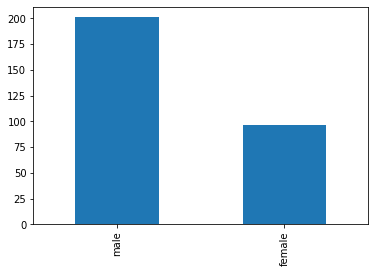

In [167]:
df['sex'].value_counts().plot(kind='bar')

It's approximately 2:1 men to women.

<AxesSubplot:>

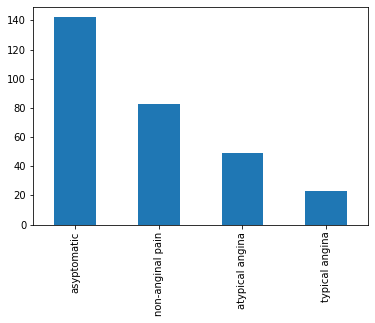

In [168]:
df['chest pain'].value_counts().plot(kind='bar')

Different chest pain types are presented.

<AxesSubplot:>

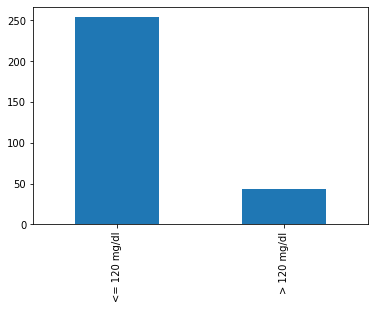

In [169]:
df["fasting blood sugar"].value_counts().plot(kind="bar")

Most people have FBS less or equal than 120 mg/dl

<AxesSubplot:>

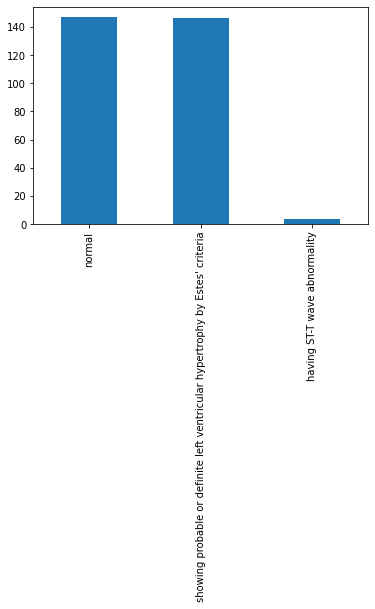

In [170]:
df["resting electrocardiographic results"].value_counts().plot(kind="bar")

There's categorical feature named "having ST-T wave abnormality" which appears much less times and can be removed.

<AxesSubplot:>

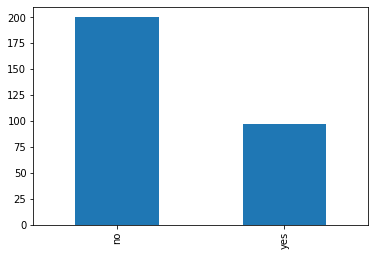

In [171]:
df["exercise induced angina"].value_counts().plot(kind="bar")

"no" values appear twice more often than "yes" values.

<AxesSubplot:>

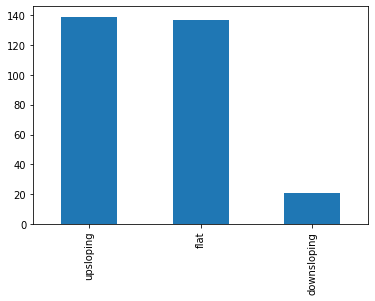

In [172]:
df["slope"].value_counts().plot(kind="bar")

downsloping values appear less often than others.

<AxesSubplot:>

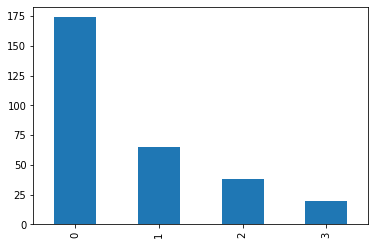

In [173]:
df["number of major vessels"].value_counts().plot(kind="bar")

The bigger the number of major vessels, the less it's frequency of appearance is.

<AxesSubplot:>

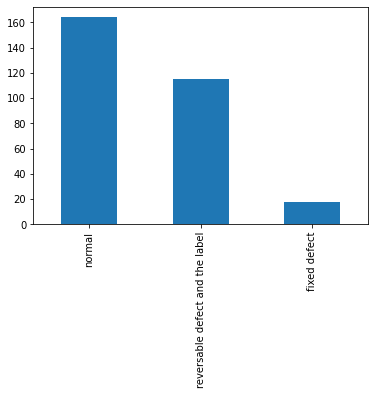

In [174]:
df["thal"].value_counts().plot(kind="bar")

Fixed detect values appear much less often.

<AxesSubplot:>

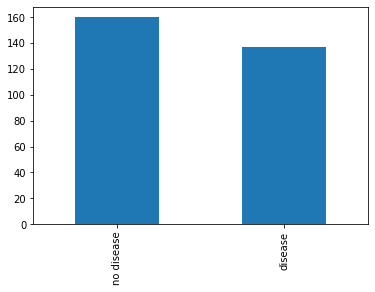

In [175]:
df["condition"].value_counts().plot(kind="bar")

There are more people, who don't have any disease.

### Numerical features analysis

<AxesSubplot:ylabel='Frequency'>

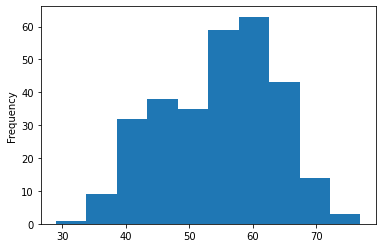

In [176]:
df["age"].plot.hist()

Age of most people is between 40 and 70.

<AxesSubplot:ylabel='Frequency'>

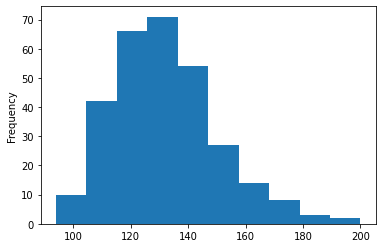

In [177]:
df["resting blood pressure"].plot.hist()

Most people have resting blood pressure from 100 to 160.

<AxesSubplot:ylabel='Frequency'>

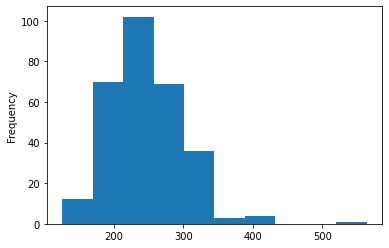

In [178]:
df["cholesterol"].plot.hist()

Different people have different levels of cholesterol but most have from 200 to 300.

<AxesSubplot:ylabel='Frequency'>

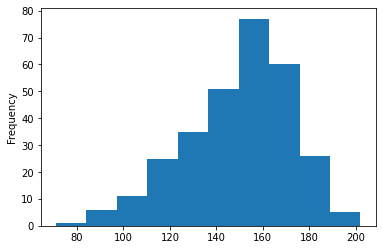

In [179]:
df["max heart rate"].plot.hist()

Most people have max heart rate from 120 to 180.

<AxesSubplot:ylabel='Frequency'>

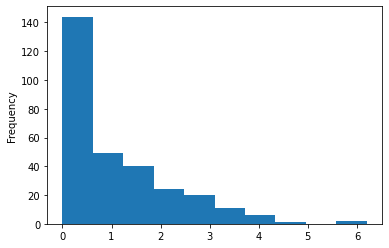

In [180]:
df["oldpeak"].plot.hist()

Most people have oldpeak close to 0.

### Profile Report

In [183]:
from pandas_profiling import ProfileReport

In [184]:
profile = ProfileReport(df)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

With the help of ProfileReport full information about variables from DataFrame can be examined.

Moreover, interactions between different variables can be seen in the section with the same name.

Also, "Correlations" section shows how different variables correlate with each other.

##### It can be seen that "condition" (target variable) is almost independent from resting blood pressure, cholesterol and fasting blood sugar.

### Feature importance

In [185]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [186]:
X = df[["age", "resting blood pressure", "cholesterol", "max heart rate", "oldpeak"]]
y = df.iloc[:, -1]

bestfeatures = SelectKBest(score_func = chi2, k = 'all')
fit = bestfeatures.fit(X, y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

featureScores = pd.concat([dfcolumns, dfscores], axis = 1)
featureScores.columns = ['Specs', 'Score']  
print(featureScores.nlargest(10, 'Score'))  

                    Specs       Score
3          max heart rate  187.053104
4                 oldpeak   68.570533
0                     age   22.917697
2             cholesterol   20.855084
1  resting blood pressure   16.707463


It is seen that "condition" highly depends on people's "max heart rate".

### Multidimensional analysis

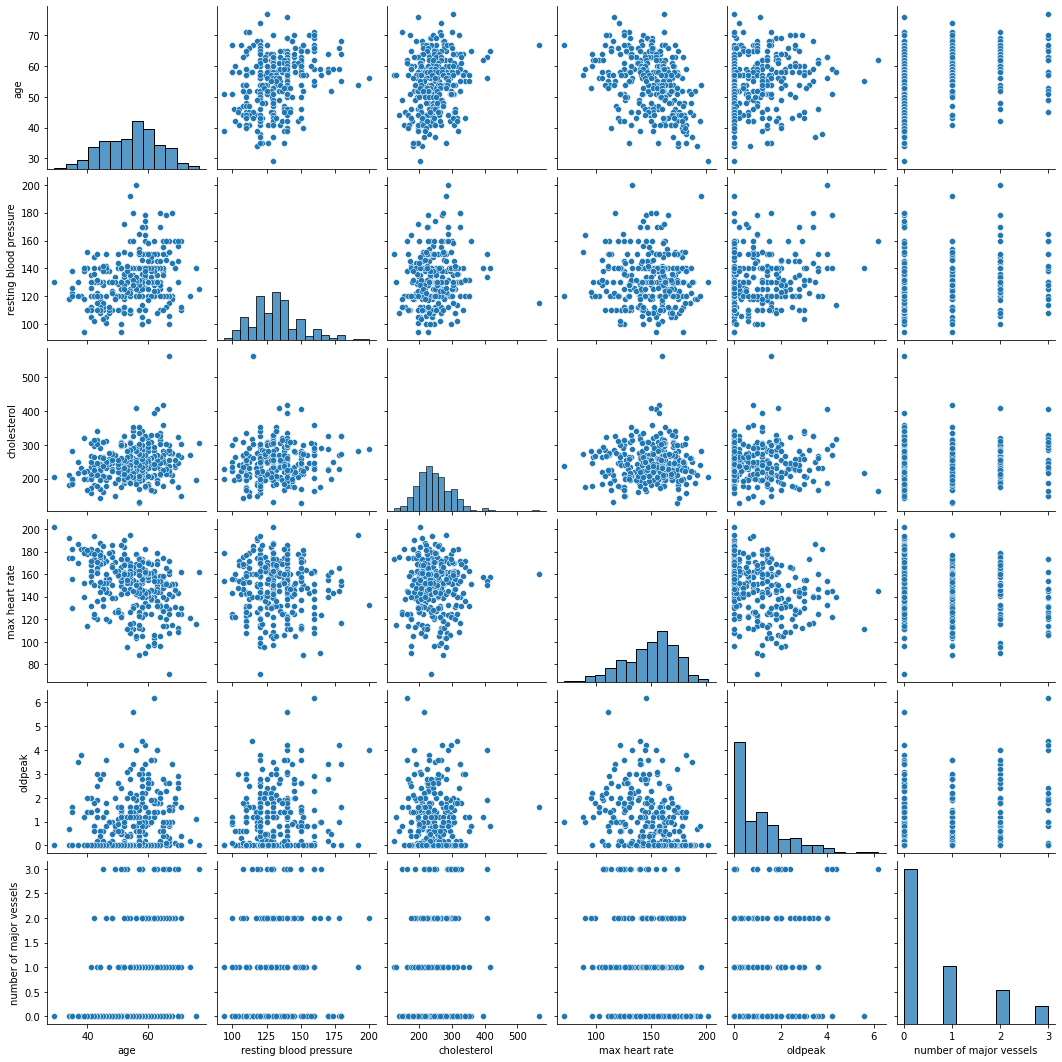

In [187]:
sns.pairplot(df)

### Dimensionality reduction and standartization

In [188]:
features = ["age", "resting blood pressure", "cholesterol", "max heart rate", "oldpeak"]

x = df.loc[:, features].values

In [189]:
from sklearn.preprocessing import StandardScaler

x = StandardScaler().fit_transform(x)
pd.DataFrame(data = x, columns = features).head()

,age,resting blood pressure,cholesterol,max heart rate,oldpeak
0,1.600302,1.596266,-0.257179,-0.812095,-0.820813
1,1.600302,0.468418,-0.160859,0.061157,0.639470
2,1.268242,1.032342,-0.411292,-1.554358,1.326662
3,1.157555,0.355633,0.667499,1.065396,0.295874
4,1.046868,-1.223355,-0.700254,-0.244481,0.639470


In [190]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns=["pc1", "pc2"])
principalDf.head()

,pc1,pc2
0,-1.496685,0.577233
1,-1.318520,0.099295
2,-2.431917,-0.863635
3,-0.544862,1.156245
4,-0.379464,-1.195003


In [196]:
df.to_csv("../data/processed/heart_cleveland_upload.csv", index=False)

In [195]:
df

,age,sex,chest pain,resting blood pressure,cholesterol,fasting blood sugar,resting electrocardiographic results,max heart rate,exercise induced angina,oldpeak,slope,number of major vessels,thal,condition
0,69,male,typical angina,160,234,> 120 mg/dl,showing probable or definite left ventricular ...,131,no,0.1,flat,1,normal,no disease
1,69,female,typical angina,140,239,<= 120 mg/dl,normal,151,no,1.8,upsloping,2,normal,no disease
2,66,female,typical angina,150,226,<= 120 mg/dl,normal,114,no,2.6,downsloping,0,normal,no disease
3,65,male,typical angina,138,282,> 120 mg/dl,showing probable or definite left ventricular ...,174,no,1.4,flat,1,normal,disease
4,64,male,typical angina,110,211,<= 120 mg/dl,showing probable or definite left ventricular ...,144,yes,1.8,flat,0,normal,no disease
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,40,male,asyptomatic,152,223,<= 120 mg/dl,normal,181,no,0.0,upsloping,0,reversable defect and the label,disease
293,39,male,asyptomatic,118,219,<= 120 mg/dl,normal,140,no,1.2,flat,0,reversable defect and the label,disease
294,35,male,asyptomatic,120,198,<= 120 mg/dl,normal,130,yes,1.6,flat,0,reversable defect and the label,disease
295,35,female,asyptomatic,138,183,<= 120 mg/dl,normal,182,no,1.4,upsloping,0,normal,no disease


### Normalization

In [44]:
from sklearn import preprocessing

df = pd.read_csv("../data/raw/heart_cleveland_upload.csv")

In [45]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,40,1,3,152,223,0,0,181,0,0.0,0,0,2,1
293,39,1,3,118,219,0,0,140,0,1.2,1,0,2,1
294,35,1,3,120,198,0,0,130,1,1.6,1,0,2,1
295,35,0,3,138,183,0,0,182,0,1.4,0,0,0,0


In [46]:
features = ["age", "trestbps", "chol", "thalach", "oldpeak"]
x = df.loc[:, features].values

min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df = pd.DataFrame(x_scaled)

In [47]:
df

,0,1,2,3,4
0,0.833333,0.622642,0.246575,0.458015,0.016129
1,0.833333,0.433962,0.257991,0.610687,0.290323
2,0.770833,0.528302,0.228311,0.328244,0.419355
3,0.750000,0.415094,0.356164,0.786260,0.225806
4,0.729167,0.150943,0.194064,0.557252,0.290323
...,...,...,...,...,...
292,0.229167,0.547170,0.221461,0.839695,0.000000
293,0.208333,0.226415,0.212329,0.526718,0.193548
294,0.125000,0.245283,0.164384,0.450382,0.258065
295,0.125000,0.415094,0.130137,0.847328,0.225806
